# Introduction to Data Analysis On South Korea's Birth Rate and Population
- The focus of this data analysis on South Korea's birth rate, in comparison to other countries, is driven by its alarming decline to one of the lowest globally. This trend poses significant challenges for the country, including demographic shifts, economic strains, and social implications. As of 2023, South Korea's birth rate has significantly dropped, with a fertility rate of just 0.81 in the first quarter, despite various governmental efforts to reverse the trend

- The continuation of this trend could lead to severe consequences for South Korea, including a shrinking workforce, increased dependency ratios, and potential economic stagnation. This analysis aims to explore these patterns through World Bank data, offering insights into South Korea's demographic future and potential policy responses.

### Objectives of the notebook:
- Explore and preprocessing the data set to visualize these trends
- Understanding South Korea's birth rate, population, fertility rate, infant mortality, maternal mortality ratio, life expectancy etc.

### Dataset:
- Retrieved from the World Bank Data

# Importing Libraries

In [122]:
import pandas as pd
import numpy as np

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

# Reading the Data Set
- `world` DataFrame to show the world data in 2023
- `birth` DataFrame to show the birth rate in different countries over time between 1960 - 2021

World Dataset

In [123]:
world = pd.read_csv('/Users/derek/Desktop/PyCharm./Unit_3_X_ML/data/Exam_Data/world-data-2023.csv')
world.head()

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887


In [124]:
world.shape

(195, 35)

In [125]:
world.describe()

,Birth Rate,Calling Code,Fertility Rate,Infant mortality,Life expectancy,Maternal mortality ratio,Physicians per thousand,Latitude,Longitude
count,189.000000,194.000000,188.000000,189.000000,187.000000,181.000000,188.000000,194.000000,194.000000
mean,20.214974,360.546392,2.698138,21.332804,72.279679,160.392265,1.839840,19.092351,20.232434
std,9.945774,323.236419,1.282267,19.548058,7.483661,233.502024,1.684261,23.961779,66.716110
min,5.900000,1.000000,0.980000,1.400000,52.800000,2.000000,0.010000,-40.900557,-175.198242
25%,11.300000,82.500000,1.705000,6.000000,67.000000,13.000000,0.332500,4.544175,-7.941496
50%,17.950000,255.500000,2.245000,14.000000,73.200000,53.000000,1.460000,17.273849,20.972652
75%,28.750000,506.750000,3.597500,32.700000,77.500000,186.000000,2.935000,40.124603,48.281523
max,46.080000,1876.000000,6.910000,84.500000,85.400000,1150.000000,8.420000,64.963051,178.065032


In [126]:
world.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    195 non-null    object 
 1   Density
(P/Km2)                            195 non-null    object 
 2   Abbreviation                               188 non-null    object 
 3   Agricultural Land( %)                      188 non-null    object 
 4   Land Area(Km2)                             194 non-null    object 
 5   Armed Forces size                          171 non-null    object 
 6   Birth Rate                                 189 non-null    float64
 7   Calling Code                               194 non-null    float64
 8   Capital/Major City                         192 non-null    object 
 9   Co2-Emissions                              188 non-null    object 
 10  CPI                       

Birth Dataset

In [253]:
birth = pd.read_csv("/Users/derek/Desktop/PyCharm./Unit_3_X_ML/data/Exam_Data/Birth_Rate.csv")
birth.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,33.883000,32.831000,31.649000,30.416000,29.147000,27.889000,...,12.723000,13.316000,13.533000,12.428000,12.300000,11.530000,9.881000,9.138000,8.102000,7.193000
1,Africa Eastern and Southern,AFE,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,47.438554,47.530552,47.597558,47.636140,47.645480,47.667660,...,36.921300,36.447139,36.028318,35.613314,35.189016,34.892536,34.611022,34.341450,33.916746,33.546266
2,Afghanistan,AFG,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,50.340000,50.443000,50.570000,50.703000,50.831000,50.872000,...,40.009000,39.601000,39.105000,38.803000,37.936000,37.342000,36.927000,36.466000,36.051000,35.842000
3,Africa Western and Central,AFW,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,47.325476,47.421051,47.529223,47.531029,47.511923,47.468568,...,40.416431,39.856506,39.335352,38.859210,38.393100,37.881661,37.447087,37.027834,36.615730,36.237034
4,Angola,AGO,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,51.026000,51.282000,51.316000,51.323000,51.282000,51.282000,...,43.860000,43.282000,42.676000,42.020000,41.377000,40.810000,40.236000,39.725000,39.271000,38.809000


In [128]:
birth.shape

(265, 66)

In [129]:
birth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 66 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    265 non-null    object 
 1   Country Code    265 non-null    object 
 2   Indicator Name  265 non-null    object 
 3   Indicator Code  265 non-null    object 
 4   1960            254 non-null    float64
 5   1961            253 non-null    float64
 6   1962            254 non-null    float64
 7   1963            253 non-null    float64
 8   1964            253 non-null    float64
 9   1965            253 non-null    float64
 10  1966            254 non-null    float64
 11  1967            253 non-null    float64
 12  1968            253 non-null    float64
 13  1969            253 non-null    float64
 14  1970            255 non-null    float64
 15  1971            255 non-null    float64
 16  1972            255 non-null    float64
 17  1973            256 non-null    flo

In [130]:
birth.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,254.000000,253.000000,254.00000,253.000000,253.000000,253.000000,254.000000,253.000000,253.000000,253.000000,...,262.000000,261.000000,263.000000,262.000000,263.000000,262.000000,263.000000,263.000000,262.000000,261.000000
mean,38.102745,37.718225,37.82555,37.710952,37.183746,36.659086,36.075208,35.728817,35.366372,34.988711,...,21.862477,21.536315,21.300735,20.888739,20.495409,20.108957,19.661771,19.316377,18.988318,18.764994
std,11.388911,11.514719,11.39171,11.408306,11.454587,11.603413,11.779015,11.755859,11.830449,11.886612,...,10.493492,10.415232,10.152606,10.081787,9.919670,9.826667,9.801403,9.720711,9.653265,9.557674
min,13.400000,13.700000,12.90000,13.100000,13.100000,13.100000,13.264000,13.017000,12.933000,11.909000,...,8.200000,7.900000,7.900000,8.000000,7.724000,6.700000,5.900000,5.900000,5.300000,5.000000
25%,27.794467,26.595211,27.89000,27.423000,26.655000,25.800000,25.225000,24.447000,23.878000,23.300000,...,12.742250,12.469000,12.550000,12.340750,11.958000,11.559491,11.112196,10.960585,10.847750,10.543514
50%,42.876000,42.372444,41.93600,41.907000,41.052000,40.492276,39.725500,39.062924,38.347069,37.777000,...,19.828500,19.417000,19.049000,18.455000,18.017000,17.715000,17.100000,16.617000,16.250500,16.093000
75%,47.231125,47.039000,46.84300,46.656000,46.509000,46.348000,46.200750,45.713000,45.693000,45.540000,...,29.755250,29.190000,28.675000,28.273250,27.930000,27.596250,27.181000,26.869500,26.282500,26.107000
max,58.121000,57.903000,57.68300,57.450000,57.192000,56.784000,56.581000,56.322000,55.995000,55.808000,...,48.019000,47.460000,46.998000,46.558000,46.520000,46.351000,46.127000,45.859000,45.588000,45.293000


# Missing Data

### World Dataset

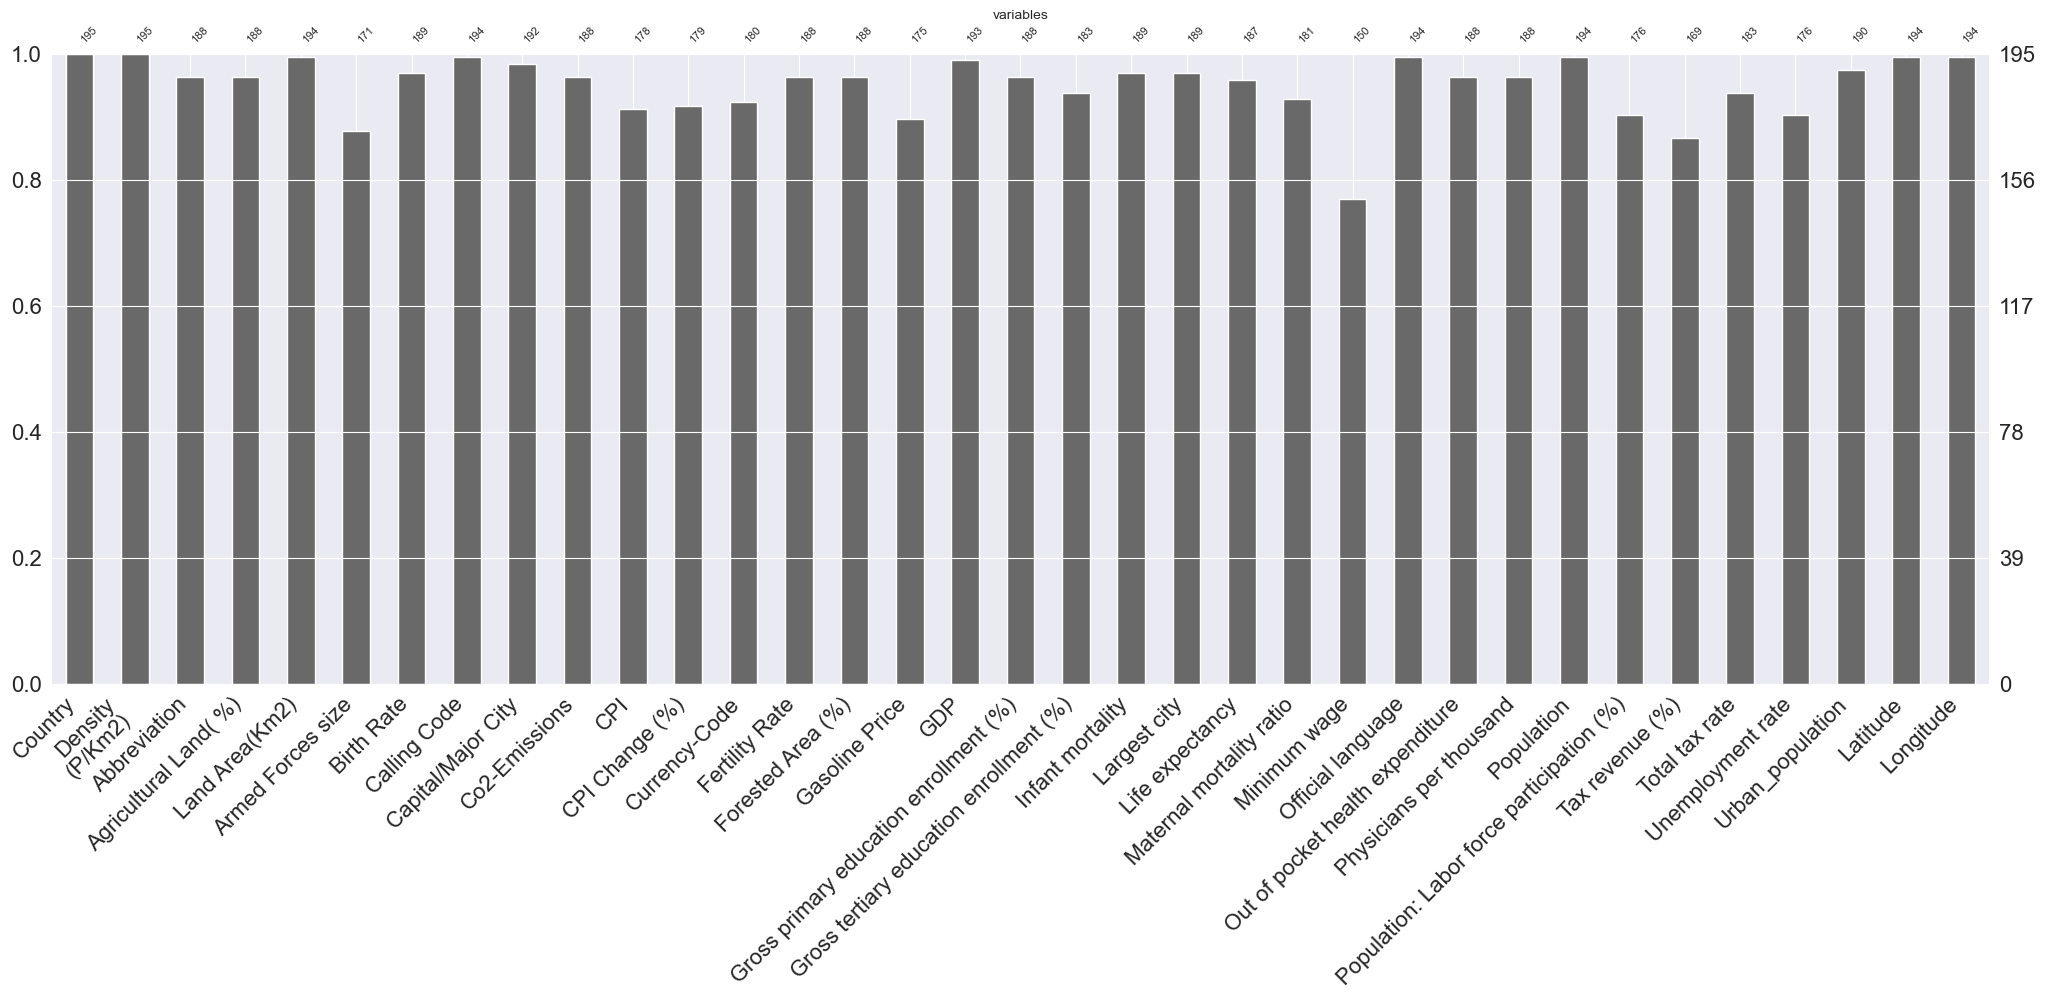

In [131]:
# Calculating the percentage of missing values in each column
missing_data_world = world.isnull().mean() * 100

# Plotting the result
plt.figure(figsize=(10,8))  # Increase figure size
msno.bar(world)

# Provide a bit more room for the x-axis labels
plt.gcf().subplots_adjust(bottom=0.25)

plt.xticks(fontsize=8)  # Decrease font size
plt.xlabel('variables')
plt.ylabel('percent_missing')

plt.show()

In [132]:
missing_data_world

Country                                       0.000000
Density\n(P/Km2)                              0.000000
Abbreviation                                  3.589744
Agricultural Land( %)                         3.589744
Land Area(Km2)                                0.512821
Armed Forces size                            12.307692
Birth Rate                                    3.076923
Calling Code                                  0.512821
Capital/Major City                            1.538462
Co2-Emissions                                 3.589744
CPI                                           8.717949
CPI Change (%)                                8.205128
Currency-Code                                 7.692308
Fertility Rate                                3.589744
Forested Area (%)                             3.589744
Gasoline Price                               10.256410
GDP                                           1.025641
Gross primary education enrollment (%)        3.589744
Gross tert

In [133]:
# Dropping NaN values

world = world.dropna()

### Birth Dataset

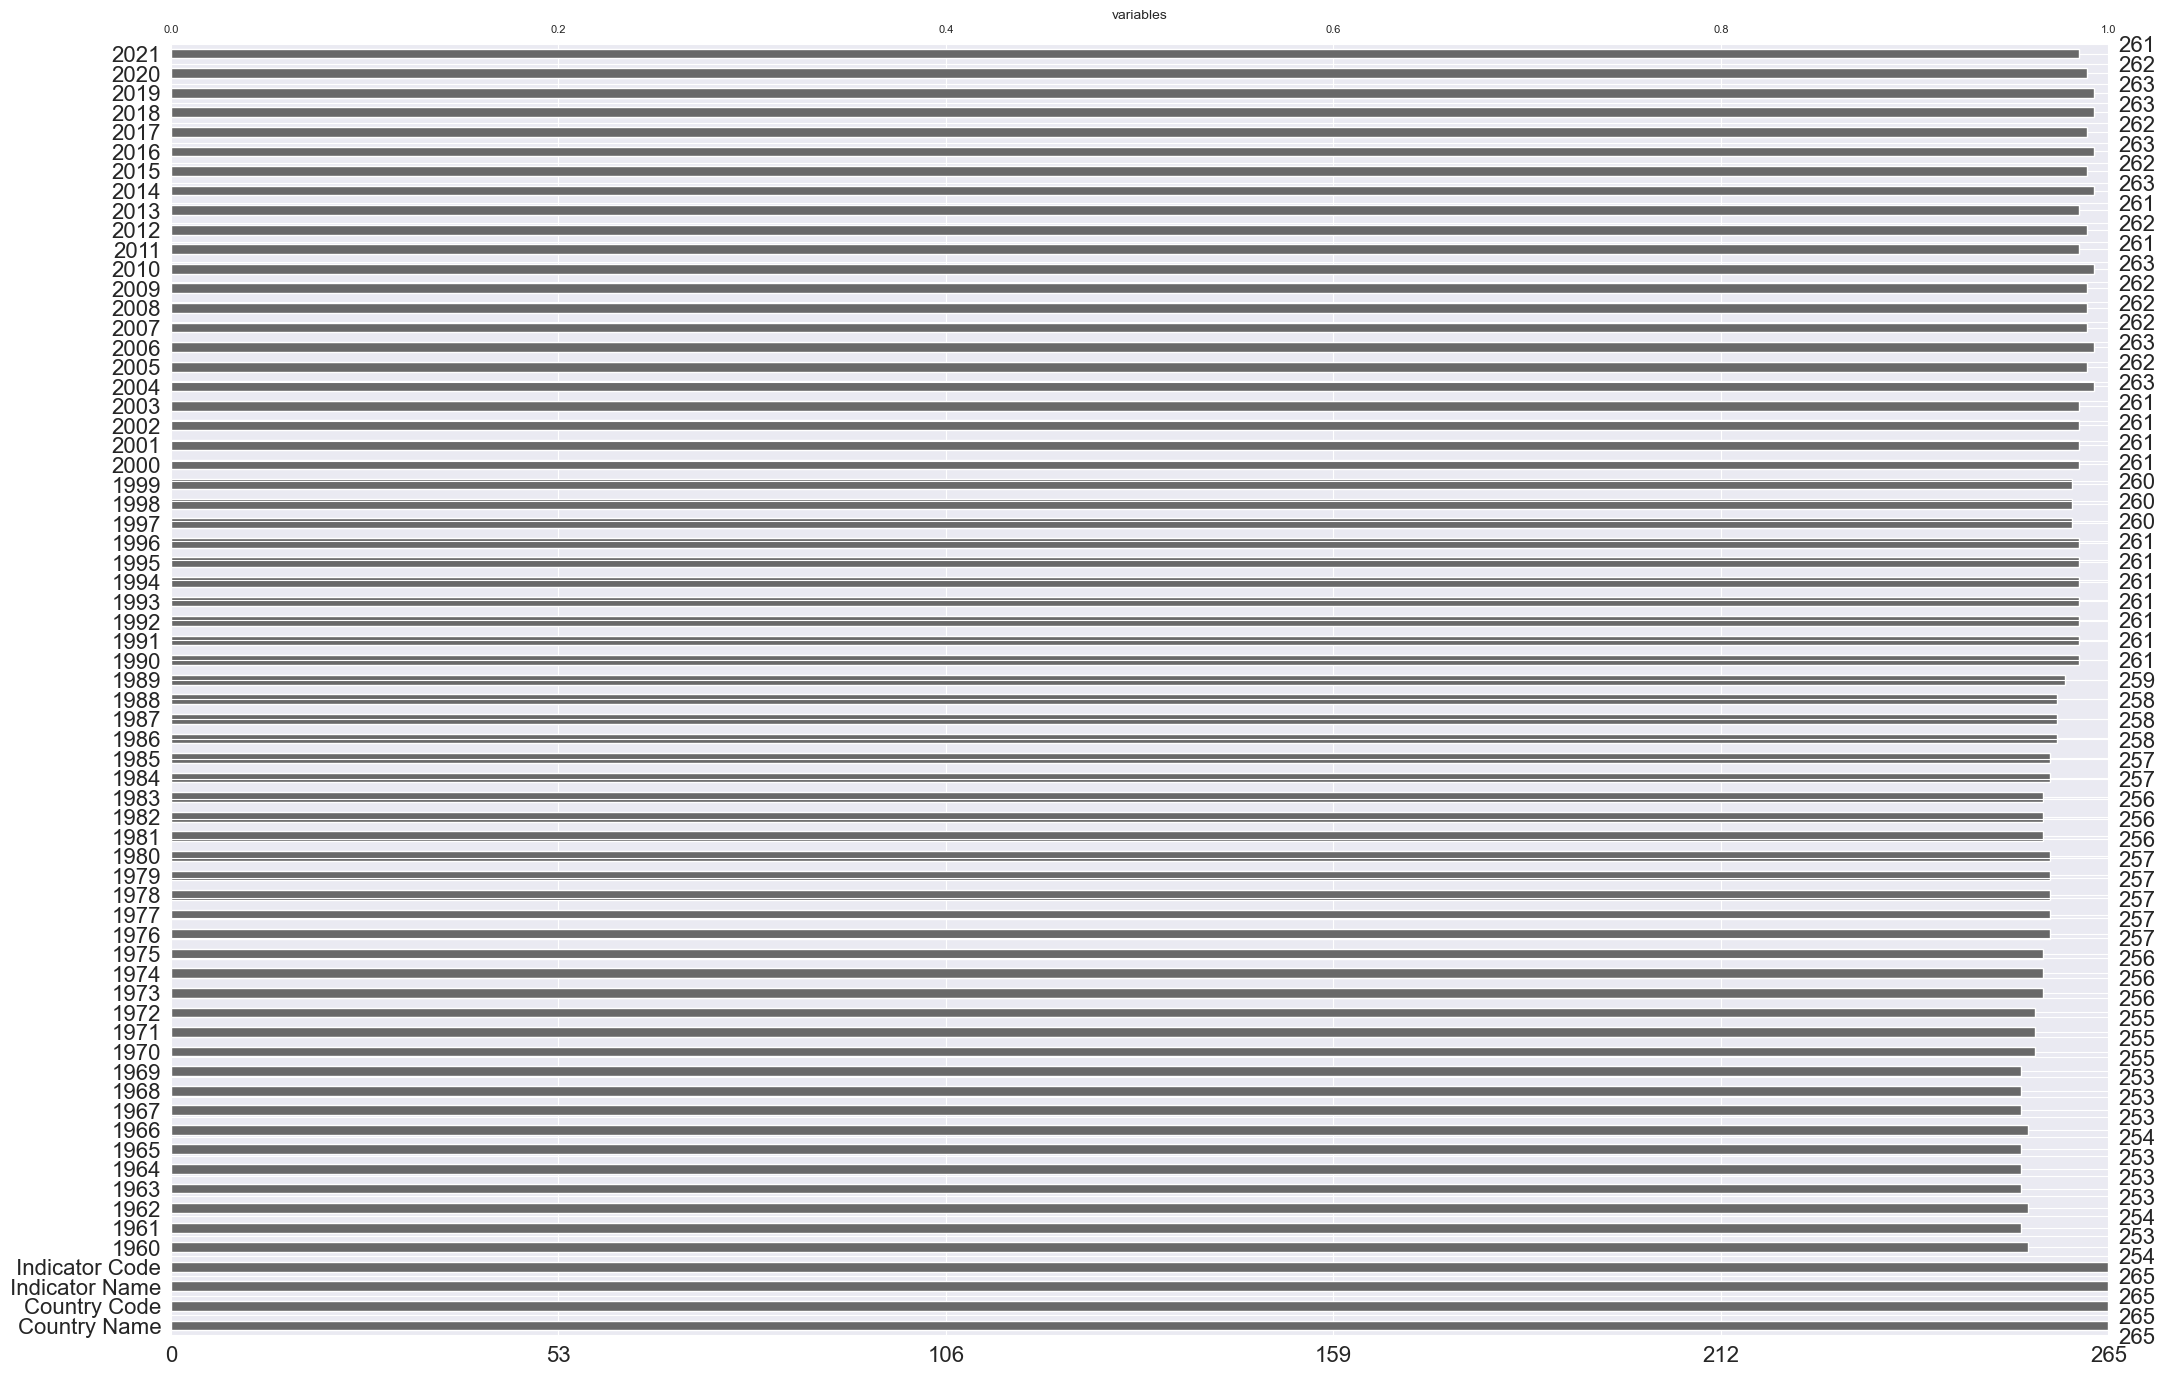

In [134]:
# Calculating the percentage of missing values in each column
missing_data_birth = birth.isnull().mean() * 100

# Plotting the result
plt.figure(figsize=(10,8))  # Increase figure size
msno.bar(birth)

# Provide a bit more room for the x-axis labels
plt.gcf().subplots_adjust(bottom=0.25)

plt.xticks(fontsize=8)  # Decrease font size
plt.xlabel('variables')
plt.ylabel('percent_missing')

plt.show()

In [135]:
missing_data_birth

Country Name      0.000000
Country Code      0.000000
Indicator Name    0.000000
Indicator Code    0.000000
1960              4.150943
                    ...   
2017              1.132075
2018              0.754717
2019              0.754717
2020              1.132075
2021              1.509434
Length: 66, dtype: float64

In [136]:
# Dropping NaN values

birth = birth.dropna()

# Dropping Unnecessary Columns

World Dataset

In [137]:
new_world = world.drop(columns=['Abbreviation', 'Agricultural Land( %)', 'Land Area(Km2)', 'Armed Forces size', 'Calling Code', 'Capital/Major City','Co2-Emissions','CPI','CPI Change (%)', 'Currency-Code','Forested Area (%)', 'Gasoline Price', 'Gross primary education enrollment (%)', 'Gross tertiary education enrollment (%)', 'Largest city', 'Minimum wage', 'Official language', 'Tax revenue (%)', 'Total tax rate', 'Latitude', 'Longitude'])

In [138]:
new_world.head()

,Country,Density\n(P/Km2),Birth Rate,Fertility Rate,GDP,Infant mortality,Life expectancy,Maternal mortality ratio,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Unemployment rate,Urban_population
0,Afghanistan,60,32.49,4.47,"$19,101,353,833",47.9,64.5,638.0,78.40%,0.28,"38,041,754",48.90%,11.12%,"9,797,273"
1,Albania,105,11.78,1.62,"$15,278,077,447",7.8,78.5,15.0,56.90%,1.20,"2,854,191",55.70%,12.33%,"1,747,593"
2,Algeria,18,24.28,3.02,"$169,988,236,398",20.1,76.7,112.0,28.10%,1.72,"43,053,054",41.20%,11.70%,"31,510,100"
4,Angola,26,40.73,5.52,"$94,635,415,870",51.6,60.8,241.0,33.40%,0.21,"31,825,295",77.50%,6.89%,"21,061,025"
6,Argentina,17,17.02,2.26,"$449,663,446,954",8.8,76.5,39.0,17.60%,3.96,"44,938,712",61.30%,9.79%,"41,339,571"


# Population

Creating a new DataFrame for the 'Population' DataFrame

In [207]:
country_population_df = new_world[['Country', 'Population', 'Density\n(P/Km2)', 'Population: Labor force participation (%)', 'Urban_population']]

country_population_df['Population'] = country_population_df['Population'].str.replace(',', '').astype(float)

country_population_df['Density\n(P/Km2)'] = country_population_df['Density\n(P/Km2)'].str.replace(',', '').astype(float)

country_population_df['Population_in_Thousands'] = country_population_df['Population'] / 1000

# Remove rows with missing 'Country' values
country_population_df = country_population_df.dropna(subset=['Country'])

/var/folders/gw/m7333wt957q0gz8nbqnf596h0000gn/T/ipykernel_18785/637615216.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_population_df['Population'] = country_population_df['Population'].str.replace(',', '').astype(float)
/var/folders/gw/m7333wt957q0gz8nbqnf596h0000gn/T/ipykernel_18785/637615216.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_population_df['Density\n(P/Km2)'] = country_population_df['Density\n(P/Km2)'].str.replace(',', '').astype(float)
/var/folders/gw/m7333wt957q0

In [208]:
country_population_df.head()

,Country,Population,Density\n(P/Km2),Population: Labor force participation (%),Urban_population,Population_in_Thousands
0,Afghanistan,38041754.0,60.0,48.90%,"9,797,273",38041.754
1,Albania,2854191.0,105.0,55.70%,"1,747,593",2854.191
2,Algeria,43053054.0,18.0,41.20%,"31,510,100",43053.054
4,Angola,31825295.0,26.0,77.50%,"21,061,025",31825.295
6,Argentina,44938712.0,17.0,61.30%,"41,339,571",44938.712


Plotting Bar Graph to show the difference in population in different countries

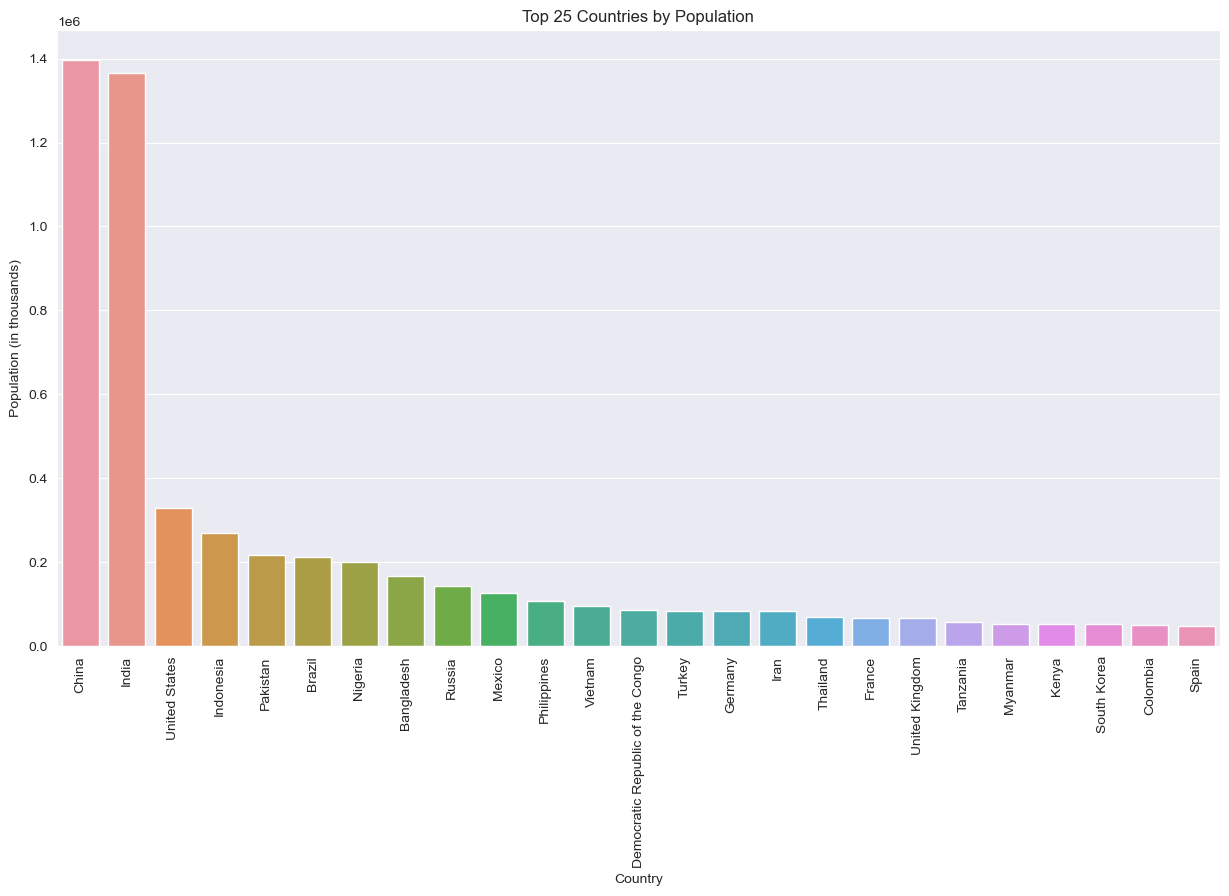

In [227]:
top_countries = country_population_df.nlargest(25, 'Population_in_Thousands')

plt.figure(figsize=(15,8))
sns.barplot(x='Country', y='Population_in_Thousands', data=top_countries)
plt.title('Top 25 Countries by Population')
plt.xlabel('Country')
plt.ylabel('Population (in thousands)')
plt.xticks(rotation=90)
plt.show()

In [228]:
top_countries[['Country', 'Population_in_Thousands']]

,Country,Population_in_Thousands
36,China,1397715.000
77,India,1366417.754
186,United States,328239.523
78,Indonesia,270203.917
131,Pakistan,216565.318
23,Brazil,212559.417
126,Nigeria,200963.599
13,Bangladesh,167310.838
143,Russia,144373.535
110,Mexico,126014.024


South Korea has a population of 51,709,098 (23rd on the list)

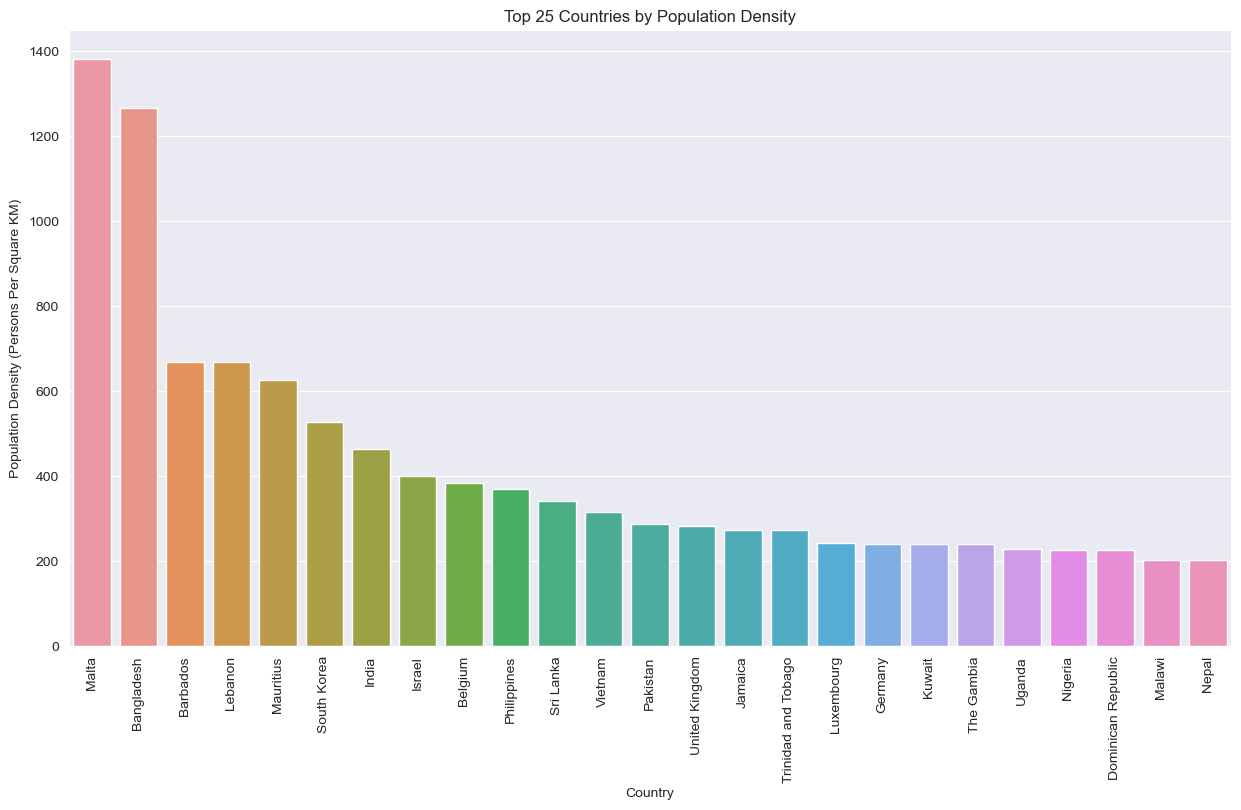

In [229]:
top_countries = country_population_df.nlargest(25, 'Density\n(P/Km2)')

plt.figure(figsize=(15,8))
sns.barplot(x='Country', y='Density\n(P/Km2)', data=top_countries)
plt.title('Top 25 Countries by Population Density')
plt.xlabel('Country')
plt.ylabel('Population Density (Persons Per Square KM)')
plt.xticks(rotation=90)
plt.show()

In [230]:
top_countries[['Country','Density\n(P/Km2)']]

,Country,Density\n(P/Km2)
106,Malta,1380.0
13,Bangladesh,1265.0
14,Barbados,668.0
94,Lebanon,667.0
109,Mauritius,626.0
162,South Korea,527.0
77,India,464.0
82,Israel,400.0
16,Belgium,383.0
138,Philippines,368.0


South Korea's population density is 527 P/Km2 (6th on the list)

# Birth Rate

Based on the World Dataset

In [233]:
country_birth_df = new_world[['Country', 'Birth Rate']]

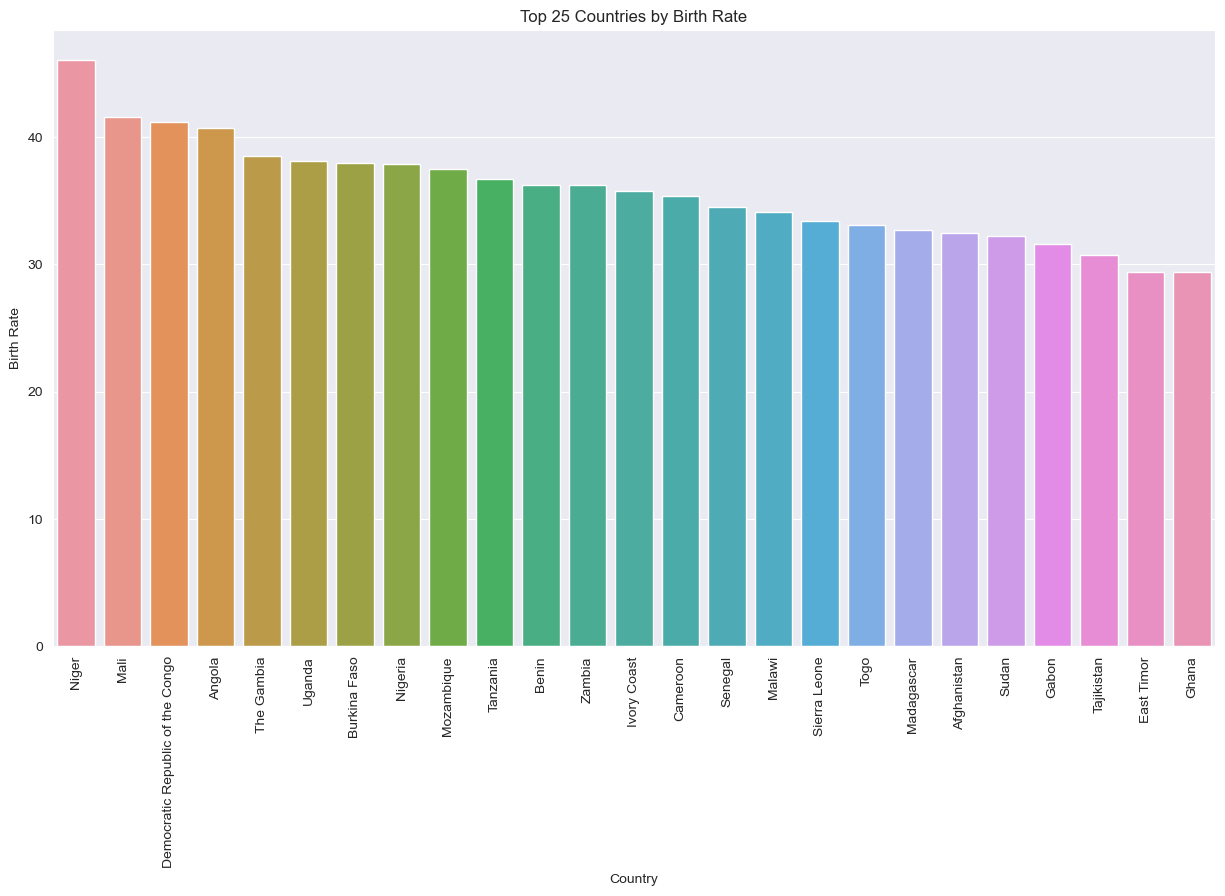

In [242]:
top_countries = country_birth_df.nlargest(25, 'Birth Rate')

plt.figure(figsize=(15,8))
sns.barplot(x='Country', y='Birth Rate', data=top_countries)
plt.title('Top 25 Countries by Birth Rate')
plt.xlabel('Country')
plt.ylabel('Birth Rate')
plt.xticks(rotation=90)
plt.show()

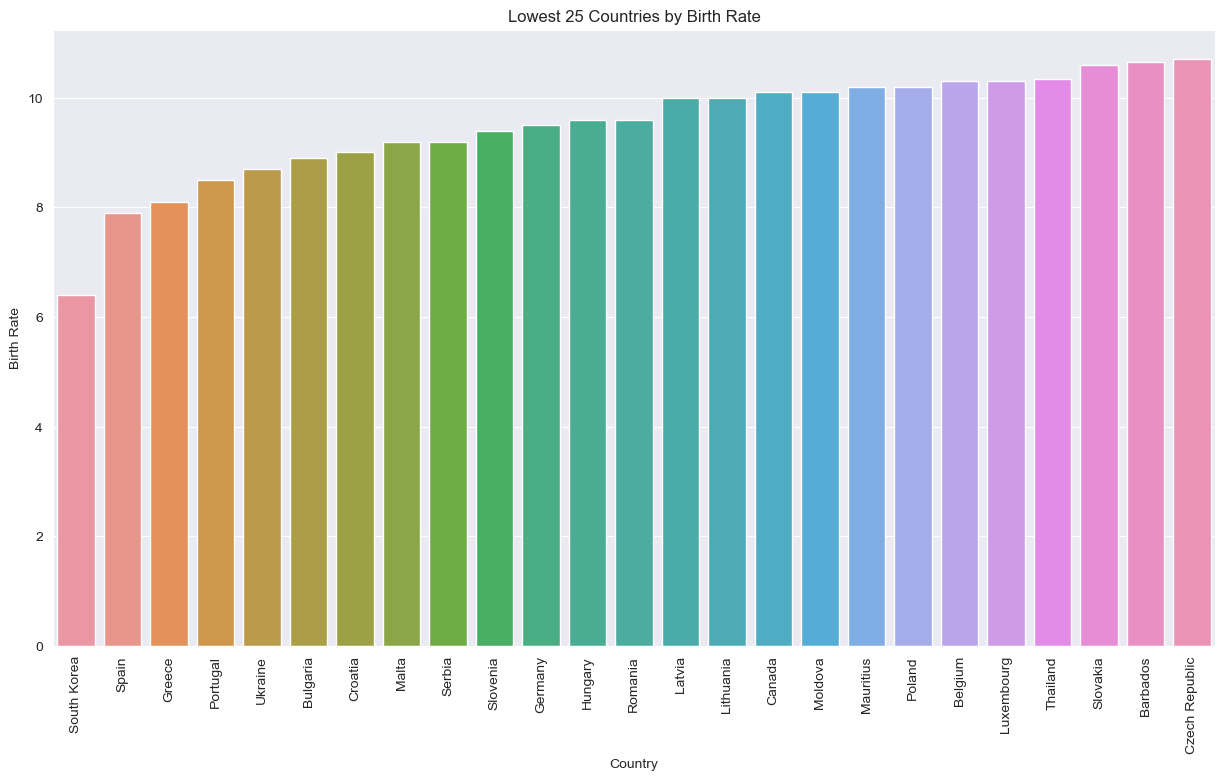

In [243]:
lowest_countries = country_birth_df.nsmallest(25, 'Birth Rate')

plt.figure(figsize=(15,8))
sns.barplot(x='Country', y='Birth Rate', data=lowest_countries)
plt.title('Lowest 25 Countries by Birth Rate')
plt.xlabel('Country')
plt.ylabel('Birth Rate')
plt.xticks(rotation=90)
plt.show()

In [247]:
top_countries

,Country,Birth Rate
125,Niger,46.08
105,Mali,41.54
45,Democratic Republic of the Congo,41.18
4,Angola,40.73
62,The Gambia,38.54
182,Uganda,38.14
26,Burkina Faso,37.93
126,Nigeria,37.91
117,Mozambique,37.52
172,Tanzania,36.70


In [240]:
lowest_countries

,Country,Birth Rate
162,South Korea,6.40
164,Spain,7.90
66,Greece,8.10
140,Portugal,8.50
183,Ukraine,8.70
25,Bulgaria,8.90
41,Croatia,9.00
106,Malta,9.20
153,Serbia,9.20
158,Slovenia,9.40


South Korea has the lowest birth rate according to the dataset with 6.4%. While the top 3 countries with the highest birth rate is Niger (46.08%), Mali (41.54%) and Democratic Republic of the Congo (41.18%). 

# Showing the trend of Birth Rate in South Korea compared to the 

### Removing unncessary columns

In [255]:
new_birth = birth.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code'])
new_birth.head()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,33.883000,32.831000,31.649000,30.416000,29.147000,27.889000,26.663000,25.503000,24.592000,...,12.723000,13.316000,13.533000,12.428000,12.300000,11.530000,9.881000,9.138000,8.102000,7.193000
1,Africa Eastern and Southern,47.438554,47.530552,47.597558,47.636140,47.645480,47.667660,47.697885,47.691330,47.691022,...,36.921300,36.447139,36.028318,35.613314,35.189016,34.892536,34.611022,34.341450,33.916746,33.546266
2,Afghanistan,50.340000,50.443000,50.570000,50.703000,50.831000,50.872000,50.986000,51.081000,51.148000,...,40.009000,39.601000,39.105000,38.803000,37.936000,37.342000,36.927000,36.466000,36.051000,35.842000
3,Africa Western and Central,47.325476,47.421051,47.529223,47.531029,47.511923,47.468568,47.443637,47.425928,47.422346,...,40.416431,39.856506,39.335352,38.859210,38.393100,37.881661,37.447087,37.027834,36.615730,36.237034
4,Angola,51.026000,51.282000,51.316000,51.323000,51.282000,51.282000,51.295000,51.314000,51.348000,...,43.860000,43.282000,42.676000,42.020000,41.377000,40.810000,40.236000,39.725000,39.271000,38.809000


### Making New DataFrame just for Korea, Rep.

In [265]:
korea_data = new_birth[new_birth['Country Name'] == 'Korea, Rep.']
korea_data = korea_data.melt(id_vars=['Country Name'], var_name='Year', value_name='Birth Rate')

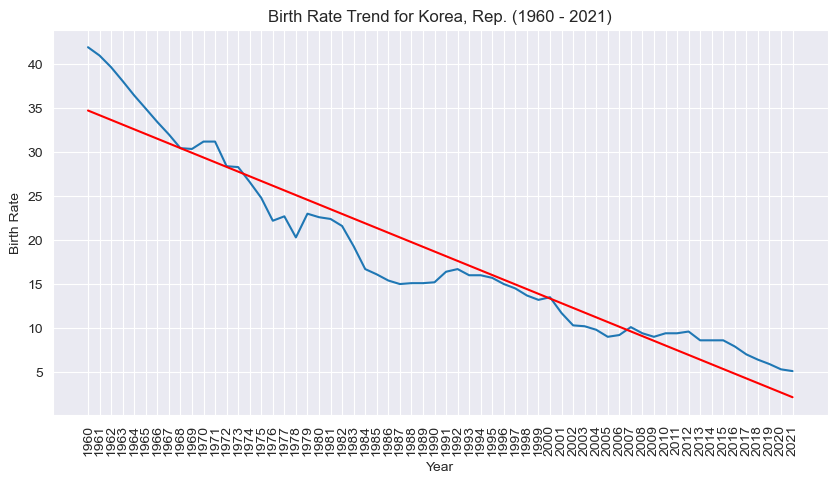

In [287]:
# Fit with np.polyfit
m, b = np.polyfit(korea_data['Year'].astype(int), korea_data['Birth Rate'], 1)

plt.figure(figsize=(10,5))
sns.lineplot(x='Year', y='Birth Rate', data=korea_data)
plt.plot(korea_data['Year'], m*korea_data['Year'].astype(int) + b, color='red')  # Trendline
plt.title('Birth Rate Trend for Korea, Rep. (1960 - 2021)')
plt.xlabel('Year')
plt.ylabel('Birth Rate')
plt.xticks(rotation=90)
plt.show()

In [291]:
# Print the slope
print("Slope: ", m)
print("Y-intercept: ", b)

Slope:  -0.5344730930976255
Y-intercept:  1082.299449875339


In [269]:
korea_data.tail(5)

,Country Name,Year,Birth Rate
57,"Korea, Rep.",2017,7.0
58,"Korea, Rep.",2018,6.4
59,"Korea, Rep.",2019,5.9
60,"Korea, Rep.",2020,5.3
61,"Korea, Rep.",2021,5.1


The trend line showing a -0.53 decline in South Korea's birth rate highlights a significant and ongoing demographic challenge. This trend underscores the urgency for comprehensive and targeted policy measures aimed at reversing the decline. Addressing the root causes and creating a more supportive environment for young families could be key to mitigating the long-term implications of this demographic shift.

### Analysis of South Korea's Birth Rate

1. Steady Decline: The negative slope indicates that South Korea's birth rate is decreasing year over year at a relatively consistent pace. This is not a sudden drop but a steady trend, which suggests underlying systemic issues rather than temporary fluctuations.

2. Magnitude of Decline: While a slope of -0.53 might not seem large at first glance, in the context of birth rates—which typically change slowly over time—this is a considerable rate of decline. It points to a rapid demographic shift that could have substantial implications for the country's future.

3. Implications for Population Growth: A declining birth rate impacts the overall population growth rate. With a slope of -0.53, South Korea is likely experiencing slow population growth or even a decrease in population, especially when combined with other factors like mortality rates and migration patterns.

4. Aging Population Concerns: A continuous decline in the birth rate contributes to an aging population. With fewer young people entering the population and a larger proportion of elderly, the country faces challenges related to healthcare, pensions, and workforce replacement.

5. Economic and Social Impact: The declining birth rate can strain the economy, as a smaller workforce must support a growing number of retirees. This can lead to increased taxes, reduced pensions, and potential labor shortages, affecting economic productivity and growth.

6. Policy Implications: The consistent negative trend signifies the need for effective policy interventions. Despite various measures taken by the South Korean government, the continued decline suggests that existing policies may not be sufficiently addressing the root causes of the low birth rate, such as high childcare costs, competitive work culture, housing affordability, and changing societal attitudes towards marriage and family life.

# Future South Korea's Birth Rate

In [289]:
korea_data['Year'] = korea_data['Year'].astype(int)

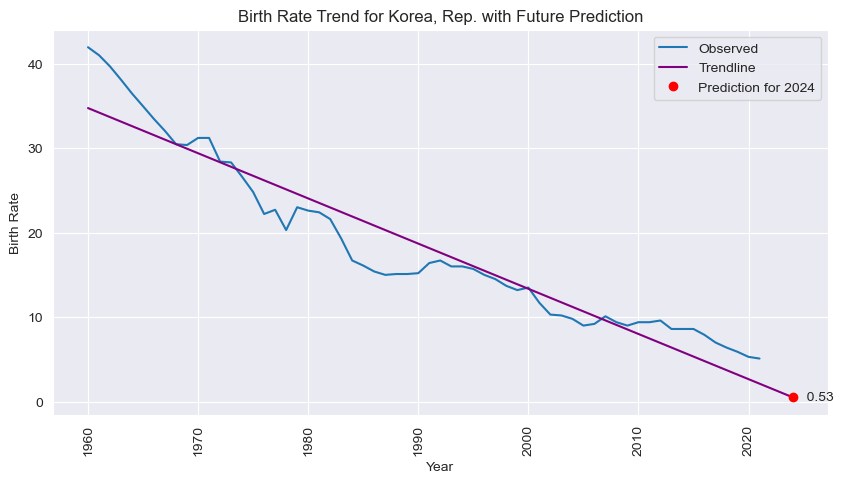

In [290]:
# Originally, we fit the line for existing data
m, b = np.polyfit(korea_data['Year'].astype(int), korea_data['Birth Rate'], 1)

# Now let's extend this for 3 years into the future
current_year = korea_data['Year'].max()
extension = np.arange(current_year + 1, current_year + 4)  # +4 to include end
all_years = np.append(korea_data['Year'].astype(int).values, extension)

# Plot extended trendline
plt.figure(figsize=(10,5))
sns.lineplot(x='Year', y='Birth Rate', data=korea_data, label='Observed')
plt.plot(all_years, m*all_years + b, color='purple', label='Trendline') # Extended trendline

# Calculate the prediction
future_year = current_year + 3
predicted_birth_rate = m * future_year + b
plt.plot(future_year, predicted_birth_rate, 'ro', label=f'Prediction for {future_year}')  # Mark the predicted point in red
plt.text(future_year+0.2, predicted_birth_rate, f'   {predicted_birth_rate:.2f}', verticalalignment='center')

# Include a title and labels
plt.title('Birth Rate Trend for Korea, Rep. with Future Prediction')
plt.xlabel('Year')
plt.ylabel('Birth Rate')
plt.xticks(rotation=90)
plt.legend()
plt.show()

According to this trend line, the prediction for 2024 is that the birth rate will be 0.53%. This clearly shows that South Korea's birth rate is dipping to its lowest levels and will cause many societal problems in the future.  